# Set up

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
! pip install cleanlab

     |████████████████████████████████| 77 kB 6.3 MB/s 


In [3]:
! pip install transformers

     |████████████████████████████████| 2.6 MB 23.5 MB/s 
     |████████████████████████████████| 3.3 MB 41.3 MB/s 
     |████████████████████████████████| 636 kB 56.1 MB/s 
     |████████████████████████████████| 895 kB 80.4 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [4]:
from transformers import BertTokenizer
tokenizer=BertTokenizer.from_pretrained('bert-base-uncased')
sentence='I really enjoyed this movie a lot.'
#1.Tokenize the sequence:
tokens=tokenizer.tokenize(sentence)
print(tokens)
print(type(tokens))

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

['i', 'really', 'enjoyed', 'this', 'movie', 'a', 'lot', '.']
<class 'list'>


extract data from yaml files, transfrom to traditional machine learning case, training data with labels.

# DOC2Vec embedding

Tokenizer and vectorize **text** with DOC2VEC

In [ ]:
! pip install gensim

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
## Try with the pretrained word2vec


In [ ]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

model = Doc2Vec.load('/content/drive/MyDrive/enwiki_dbow/doc2vec.bin')

FileNotFoundError: ignored

# Bert Embedding

In [5]:
import gensim
import gensim.downloader as api
import numpy as np
from __future__ import print_function, absolute_import, division, with_statement
import cleanlab
import numpy as np
from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
# To silence convergence warnings caused by using a weak
# logistic regression classifier on image data
import warnings
warnings.simplefilter("ignore")
np.random.seed(477)


In [6]:
# BertSentence Embedding

In [7]:
!pip install sentence-transformers

     |████████████████████████████████| 85 kB 3.7 MB/s 
     |████████████████████████████████| 1.2 MB 19.7 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.0.0-py3-none-any.whl size=126710 sha256=eea1a9c1a8cbcb7e5a0da83a3b18f5bb5f4cdc1db08db41e868720b13eb7e02a
  Stored in directory: /root/.cache/pip/wheels/d1/c1/0f/faafd427f705c4b012274ba60d9a91d75830306811e1355293
Successfully built sentence-transformers


In [8]:
from sentence_transformers import SentenceTransformer
sbert_model = SentenceTransformer('bert-base-nli-mean-tokens')

query = "I had pizza and pasta"
query_vec = sbert_model.encode([query])[0]



Downloading:   0%|          | 0.00/391 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.95k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/625 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/122 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/229 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/438M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/399 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

# Confident learning based on the MLP classifer

1.	Train a classifier (MLPClassifier) using only the original FAQ examples to predict the FAQ class.
2.	For each augmented data point, use the classifier to predict the probability (classifier.predict_proba) of it belonging to each intent.
3.	Find the probability that the point belongs to the correct class. E.g. if the correct class is fur, find the probability that the classifier predicts the example as being fur.
4.	If this probability is below some threshold value, then we remove it from our data set as it is an incorrect label.


In [ ]:
# shuffle linked train and target

def shuffle(x,y):
  from sklearn.utils import shuffle
  import numpy as np


  x, y = shuffle(x, y)




  return x,y

In [11]:
# convert yaml training files into matrix X with label s

def BertEmbed(path):
  import yaml
  with open(path,'r') as f:
    data=yaml.safe_load(f)

  f_train=[]
  for i in data['nlu']:
    text=[]
    for j in i['examples'].split('\n'):     # get the clean data from yaml
      input=j.replace('- ','')
      text.append(input)
    f_train.append(text)
  
  
  text=[]
  for i in data['nlu']:
    for j in i['examples'].split('\n'):     # get the clean data from yaml
      input=j.replace('- ','')
      text.append(input)




  raw=[]
  text_clean=[] 
  for x in text:
    if x != '':
      raw.append(x)
      text_clean.append(sbert_model.encode([x])[0])


  # X=[]

  # for s in text_clean:
    
  #   sentence=s
  #   X.append(sentence)

  X=np.array(text_clean)
  # np.random.seed(1)
  # np.random.shuffle(X)
  

  label=[]
  num=[]
  for i in data['nlu']:
    # print(i['examples'].split('\n'))
    num.append(len(i['examples'].split('\n'))-1)
    label.append(i['intent'])
  # print(label)  



  Y=[]
  label_n=np.arange(len(label))
  for i,j in zip(num,label_n):
    Y.extend(np.ones(i)*j)

  assert len(Y)==X.shape[0]

  s=np.array(Y).astype('int')
  # np.random.shuffle(s)
  # X,s=shuffle(X,s)  
  return X,s,f_train

# MLP_hand_CL applyied in T5 augmented data

x train data is original data;

x test is augmented data 

In [12]:
# train a classifier

from sklearn.neural_network import MLPClassifier
x_train,y_train,_=BertEmbed('/content/drive/MyDrive/ayo-faq/rasa-faq/data/nlu.yml')

clf = MLPClassifier(random_state=1, max_iter=300, solver='lbfgs')
clf.fit(x_train, y_train)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=300,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [13]:
x_test,y_test,_=BertEmbed('/content/drive/MyDrive/hf_asos/ayo-faq/rasa-faq/data/cv/1cv_1augumented_fixed.yml')
result=clf.predict_proba(x_test)
# return a confusion matrix
result

array([[1.00000000e+000, 7.00875026e-180, 1.47078517e-157, ...,
        6.68505123e-044, 1.46249841e-102, 4.24959017e-193],
       [9.99999986e-001, 1.26492169e-161, 1.55096955e-137, ...,
        1.17299945e-034, 9.74514001e-087, 2.58277477e-180],
       [1.00000000e+000, 1.84997692e-156, 2.37921553e-136, ...,
        7.87367398e-034, 3.92351732e-091, 2.94001600e-171],
       ...,
       [9.73774168e-106, 1.08300426e-028, 5.10212965e-035, ...,
        2.08050832e-036, 2.19830683e-077, 1.00000000e+000],
       [1.21050244e-071, 2.55213613e-064, 1.02857691e-071, ...,
        9.99843026e-001, 6.58031339e-091, 1.56973641e-004],
       [6.70152415e-107, 1.91094670e-075, 6.29344741e-078, ...,
        1.61378386e-021, 3.67353156e-113, 1.00000000e+000]])

In [ ]:
noise_ind=[]
count=0
for (i,j) in zip(result,y_test):
  if i[j]<0.8:
    noise_ind.append(count)
  count=count+1
print(noise_ind)

[9, 17, 27, 28, 33, 42, 43, 72, 74, 78, 88, 100, 141, 146, 150, 153, 163, 168, 170, 171, 177, 183, 204, 206, 211, 213, 216, 221, 226, 236, 247, 255, 260, 261, 265, 272, 273, 282, 293, 296, 299, 309, 313, 317, 326, 329, 339, 340, 343, 346, 350, 363, 368, 370, 393, 395, 397, 399, 403, 412, 417, 429, 453, 454, 458, 461, 471, 476, 479, 500, 505, 519, 530]


In [ ]:
# Confident learning into 50 augmented data
# put the previous steps into a function

def find_error(path, threshold):
  x_test,y_test,f_train=BertEmbed(path)
  result=clf.predict_proba(x_test)
  # return a confusion matrix

  noise_ind=[]
  count=0
  for (i,j) in zip(result,y_test):
    if i[j]<threshold:
      noise_ind.append(count)
    count=count+1
  return noise_ind,f_train


In [ ]:
# convert our 1d noise_ind into 2d noise_ind

def convert_id(clean_id,f_train):
  len_id=[]
  for i in f_train:
    len_id.append(len(i))
  len_id=np.array(len_id) 
  ind_2d=[]
  for id in clean_id:
    for i in range(0,32): # 33 intents in total  row_id i
      if (np.sum(len_id[:i+1])>id)&(np.sum(len_id[:i])<=id):
        j=id-np.sum(len_id[:i])
        ind_2d.append([i,j])
  return ind_2d

In [ ]:
num_remove=[]
for iii in range(1,6):
  

  dirtloc=[]
  # apply confident learning in T5 file
  for fi in range(1,11):
    counter=0
    path='/content/drive/MyDrive/hf_asos/ayo-faq/rasa-faq/data/cv/{}cv_{}augumented_fixed.yml'.format(iii,fi)
    noise_ind,f_train=find_error(path,0.8)
    ind_2d=convert_id(noise_ind,f_train)

        
    dirtloc.append(np.array(ind_2d))
    
 


  


  for fi in range(1,11):
    noise_ind=dirtloc[fi-1]
    import yaml
    with open('/content/drive/MyDrive/hf_asos/ayo-faq/rasa-faq/data/cv/{}cv_{}augumented_fixed.yml'.format(iii,fi),'r') as f:
      data=yaml.safe_load(f)

    c=data

    f_train=[]
    for i in data['nlu']:
      text=[]
      for j in i['examples'].split('\n'):     # get the clean data from yaml
        input=j.replace('- ','')
        text.append(input)
      f_train.append(text)

# remove noise
    for i in noise_ind:
      
      

      f_train[i[0]][i[1]]=''

        #################


# rewirte files

    for (i,j) in zip(f_train,c['nlu']):
      l=[]
      for k in i:
        if k == '':
          continue
        else:
          # sentence=k.replace('- ','')
          l.append(k)  
          
      print(l)        
      j['examples']=l
    


    with open('/content/drive/MyDrive/gpt3/{}cl_mlp_{}.yml'.format(iii,fi), 'w') as outfile:
        yaml.dump(c, outfile, default_flow_style=False, sort_keys=False)

In [ ]:
def count(data):
  count=0
  for i in data['nlu']:
    count=count+len(i['examples'])-1  
  return count

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

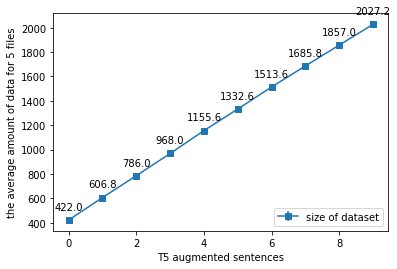

In [ ]:
# count the amount of data for cleaned data
data_size=[]
for iii in range(1,6):
  for fi in range(1,11):
    with open('/content/drive/MyDrive/gpt3/{}cl_mlp_{}.yml'.format(iii,fi),'r') as f:
          data=yaml.safe_load(f)
          data_size.append(count(data))
          


data_size=np.split(np.array(data_size),5)
num_result=np.mean(data_size,axis=0)
num_std=np.std(data_size,axis=0)
import matplotlib.pyplot as plt
import numpy as np
x=np.arange(0,10)
error=[num_std]
# plt.plot(x,num_result)
# plt.errorbar(xval, yval, xerr = 0.4, yerr = 0.5)
plt.errorbar(x,num_result,yerr=num_std,marker='s')

plt.legend(["size of dataset"],loc='lower right')
plt.ylabel('the average amount of data for 5 files')
plt.xlabel('T5 augmented sentences')

for i,j in zip(x,num_result):
  plt.annotate('{}'.format(j), (i,j), 
               textcoords="offset points", 
                 xytext=(0,10),
                 ha='center')
from google.colab import files

   
plt.savefig('mlp_cl_data_size.png')
files.download("mlp_cl_data_size.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

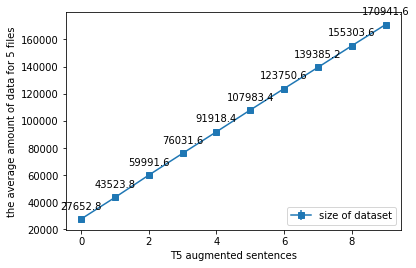

In [ ]:
# count the amount of data for cleaned data
data_size=[]
for iii in range(1,6):
  for fi in range(1,11):
    with open('/content/drive/MyDrive/hf_asos/ayo-faq/rasa-faq/data/cv/{}cv_{}augumented_fixed.yml'.format(iii,fi),'r') as f:
          data=yaml.safe_load(f)
          data_size.append(count(data))
          


data_size=np.split(np.array(data_size),5)
num_result=np.mean(data_size,axis=0)
num_std=np.std(data_size,axis=0)
import matplotlib.pyplot as plt
import numpy as np
x=np.arange(0,10)
error=[num_std]
# plt.plot(x,num_result)
# plt.errorbar(xval, yval, xerr = 0.4, yerr = 0.5)
plt.errorbar(x,num_result,yerr=num_std,marker='s')

plt.legend(["size of dataset"],loc='lower right')
plt.ylabel('the average amount of data for 5 files')
plt.xlabel('T5 augmented sentences')

for i,j in zip(x,num_result):
  plt.annotate('{}'.format(j), (i,j), 
               textcoords="offset points", 
                 xytext=(0,10),
                 ha='center')
from google.colab import files

   
plt.savefig('T5_data_size.png')
files.download("T5_data_size.png")

In [ ]:
print(data_size)

[432, 622, 800, 970, 1160, 1326, 1503, 1683, 1848, 2020, 423, 603, 780, 973, 1154, 1334, 1504, 1673, 1855, 2029, 411, 589, 765, 949, 1138, 1320, 1503, 1675, 1851, 2015, 425, 617, 799, 970, 1166, 1345, 1535, 1712, 1871, 2041, 419, 603, 786, 978, 1160, 1338, 1523, 1686, 1860, 2031]


# MLP_hand_CL applied in gpt3 augmented data

In [ ]:
# train a classifier
# nlu 32 intents in this case
from sklearn.neural_network import MLPClassifier
x_train,y_train,_=BertEmbed('/content/drive/MyDrive/hf_asos/ayo-faq/nlu.yml')

clf = MLPClassifier(random_state=1, max_iter=300, solver='lbfgs')
clf.fit(x_train, y_train)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=300,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [ ]:
x_test,y_test,_=BertEmbed('/content/drive/MyDrive/hf_asos/ayo-faq/rasa-faq/data/cv/1cv_1augumented_fixed.yml')
result=clf.predict_proba(x_test)
# return a confusion matrix

In [ ]:
noise_ind=[]
count=0
for (i,j) in zip(result,y_test):
  if i[j]<0.8:
    noise_ind.append(count)
  count=count+1
print(noise_ind)

[9, 17, 27, 28, 33, 42, 43, 72, 74, 78, 88, 100, 141, 146, 150, 153, 163, 168, 170, 171, 177, 183, 204, 206, 211, 213, 216, 221, 226, 236, 247, 255, 260, 261, 265, 272, 273, 282, 293, 296, 299, 309, 313, 317, 326, 329, 339, 340, 343, 346, 350, 363, 368, 370, 393, 395, 397, 399, 403, 412, 417, 429, 453, 454, 458, 461, 471, 476, 479, 500, 505, 519, 530]


In [ ]:
# Confident learning into 50 augmented data
# put the previous steps into a function

def find_error(path, threshold):
  x_test,y_test,f_train=BertEmbed(path)
  result=clf.predict_proba(x_test)
  # return a confusion matrix

  noise_ind=[]
  count=0
  for (i,j) in zip(result,y_test):
    if i[j]<threshold:
      noise_ind.append(count)
    count=count+1
  return noise_ind,f_train


In [ ]:
# convert our 1d noise_ind into 2d noise_ind

def convert_id(clean_id,f_train):
  len_id=[]
  for i in f_train:
    len_id.append(len(i))
  len_id=np.array(len_id) 
  ind_2d=[]
  for id in clean_id:
    for i in range(0,32): # 33 intents in total  row_id i
      if (np.sum(len_id[:i+1])>id)&(np.sum(len_id[:i])<=id):
        j=id-np.sum(len_id[:i])
        ind_2d.append([i,j])
  return ind_2d

In [ ]:
c['nlu'][0]['examples']

[' Is the fur in this product real?',
 ' Do you have any real fur products?',
 ' What kind of fur is it?',
 ' Is this product made from real fur?',
 ' is the fur on your products real?',
 ' Is fur used in your products real?']

In [ ]:
num_remove=[]
for iii in range(1,6):
  

  dirtloc=[]
  # apply confident learning in T5 file
  for fi in range(1,11):
    counter=0
    # read gpt3 augmented data
    path='/content/drive/MyDrive/gpt3/{}cv_{}augumented_fixed.yml'.format(iii,fi)
    noise_ind,f_train=find_error(path,0.8)
    ind_2d=convert_id(noise_ind,f_train)

        
    dirtloc.append(np.array(ind_2d))
    
 


  


  for fi in range(1,11):
    noise_ind=dirtloc[fi-1]
    import yaml
    with open('/content/drive/MyDrive/gpt3/{}cv_{}augumented_fixed.yml'.format(iii,fi),'r') as f:
      data=yaml.safe_load(f)

    c=data

    f_train=[]
    for i in data['nlu']:
      text=[]
      for j in i['examples'].split('\n'):     # get the clean data from yaml
        input=j.replace('- ','')
        text.append(input)
      f_train.append(text)

# remove noise
    for i in noise_ind:
      
      

      f_train[i[0]][i[1]]=''

        #################


# rewirte files

    for (i,j) in zip(f_train,c['nlu']):
      l=[]
      for k in i:
        if k == '':
          continue
        else:
          # sentence=k.replace('- ','')

          l.append(k)  
          
      print(l)
      # break       
      j['examples']=l
    
    # print(c['nlu'])

    with open('/content/drive/MyDrive/confidentlearning_applied_gpt3/{}cl_mlp_{}.yml'.format(iii,fi), 'w') as outfile:
        yaml.dump(c, outfile, default_flow_style=False, sort_keys=False)

  print('Done one')

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
def count(data):
  count=0
  for i in data['nlu']:
    count=count+len(i['examples'])-1  
  return count

In [ ]:
# count the amount of data
data_size=[]
for iii in range(1,6):
  for fi in range(1,11):
    with open('/content/drive/MyDrive/gpt3/{}cl_mlp_{}.yml'.format(iii,fi),'r') as f:
          data=yaml.safe_load(f)
          data_size.append(count(data))
          

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

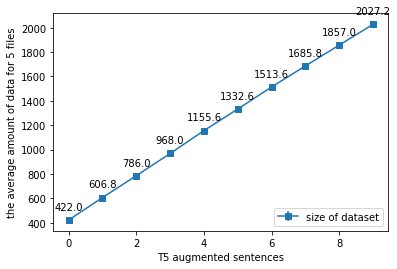

In [ ]:
data_size=np.split(np.array(data_size),5)
num_result=np.mean(data_size,axis=0)
num_std=np.std(data_size,axis=0)
import matplotlib.pyplot as plt
import numpy as np
x=np.arange(0,10)
error=[num_std]
# plt.plot(x,num_result)
# plt.errorbar(xval, yval, xerr = 0.4, yerr = 0.5)
plt.errorbar(x,num_result,yerr=num_std,marker='s')

plt.legend(["size of dataset"],loc='lower right')
plt.ylabel('the average amount of data for 5 files')
plt.xlabel('T5 augmented sentences')

for i,j in zip(x,num_result):
  plt.annotate('{}'.format(j), (i,j), 
               textcoords="offset points", 
                 xytext=(0,10),
                 ha='center')
from google.colab import files

   
plt.savefig('mlp_cl_data_size.png')
files.download("mlp_cl_data_size.png")

In [ ]:
print(data_size)

[432, 622, 800, 970, 1160, 1326, 1503, 1683, 1848, 2020, 423, 603, 780, 973, 1154, 1334, 1504, 1673, 1855, 2029, 411, 589, 765, 949, 1138, 1320, 1503, 1675, 1851, 2015, 425, 617, 799, 970, 1166, 1345, 1535, 1712, 1871, 2041, 419, 603, 786, 978, 1160, 1338, 1523, 1686, 1860, 2031]


# Confident learning in Clean lab

In [ ]:
def computepsx(path):


  
  import yaml
  with open(path,'r') as f:
    data=yaml.safe_load(f)

  f_train=[]
  for i in data['nlu']:
    text=[]
    for j in i['examples'].split('\n'):     # get the clean data from yaml
      input=j.replace('- ','')
      text.append(input)
    f_train.append(text)
  
  
  text=[]
  for i in data['nlu']:
    for j in i['examples'].split('\n'):     # get the clean data from yaml
      input=j.replace('- ','')
      text.append(input)




  raw=[]
  text_clean=[] 
  for x in text:
    if x != '':
      raw.append(x)
      text_clean.append(sbert_model.encode([x])[0])


  # X=[]

  # for s in text_clean:
    
  #   sentence=s
  #   X.append(sentence)

  X=np.array(text_clean)


  label=[]
  num=[]
  for i in data['nlu']:
    # print(i['examples'].split('\n'))
    num.append(len(i['examples'].split('\n'))-1)
    label.append(i['intent'])
  # print(label)  



  Y=[]
  label_n=np.arange(len(label))
  for i,j in zip(num,label_n):
    Y.extend(np.ones(i)*j)

  assert len(Y)==X.shape[0]

  s=np.array(Y).astype('int')


  psx = cleanlab.latent_estimation.estimate_cv_predicted_probabilities(
      X, s, clf=LogisticRegression(max_iter=10000, multi_class='auto', solver='lbfgs'))


  return psx,num,raw,s,f_train

In [ ]:
# label=[]
# num=[]
# for i in data['nlu']:
#     # print(i['examples'].split('\n'))
#   num.append(len(i['examples'].split('\n'))-1)
#   label.append(i['intent'])
#   # print(label)  

In [ ]:
def clean(path):

  import yaml
  with open(path,'r') as f:
    data=yaml.safe_load(f)

  text=[]
  for i in data['nlu']:
    for j in i['examples'].split('\n'):     # get the clean data from yaml
      input=j.replace('- ','')
      text.append(input)


  raw=[]
  text_clean=[] 
  for x in text:
    if x != '':
      raw.append(x)
  return raw

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
! mkdir cl

In [ ]:
# for iii in range(1,6):
#   psx,_,raw1,_=computepsx('/content/drive/MyDrive/hf_asos/ayo-faq/data/{}cv_original_train.yml'.format(iii))


#   dirtloc=[]

#   for fi in range(1,11):

#     psx,num,raw2,s=computepsx('/content/drive/MyDrive/hf_asos/ayo-faq/rasa-faq/data/cv/{}cv_{}augumented_fixed.yml'.format(iii,fi))


#     # put the original data into confident label


#     id=[]
#     for i in raw1:
#       try:
        
#         id.append(raw2.index(i))
#       except:
#         continue

#     l=[]
#     for i in range(len(num)):
#       l.append(sum(num[:i+1]))

#     l=np.array(l)

#     # change the psx matrix to make sure our confirmed cases is put in correct position
#     for j in id:
      
#       loc=len(np.where(l<j)[0])
#       psx[j]=np.zeros(len(psx[j]))
#       psx[j][loc]=1



#     from cleanlab.pruning import get_noise_indices

#     ordered_label_errors = get_noise_indices(
#         s=s,
#         psx=psx,
#         sorted_index_method='normalized_margin', # Orders label errors
#     )

#     ind=np.array(sorted(ordered_label_errors))

#     clean_id=[]
#     count=0
#     for i in ind:
#       print(psx[i])
#       if psx[i][0]==1:
#         print('---------------------------------------------')
#         continue
#       elif psx[i][0]==0:
#         continue

#       else:
#         # intent=label[s[i]]
#         b=raw2[i]
#         count=count+1
#         clean_id.append(i)
#         # print('{} : {}'.format(intent,b))
#       dirtloc.append(np.array(clean_id))



#   T=[]
#   for fi in range(1,11):
#     input=dirtloc[fi-1]
#     plain=clean('/content/drive/MyDrive/hf_asos/ayo-faq/rasa-faq/data/cv/{}cv_{}augumented_fixed.yml'.format(iii,fi))
#     T.append(np.array(plain)[np.array(dirtloc[0])])
#     # plain = np.delete(plain,input)


#   for fi in range(1,11):
    
#     import yaml
#     with open('/content/drive/MyDrive/hf_asos/ayo-faq/rasa-faq/data/cv/{}cv_{}augumented_fixed.yml'.format(iii,fi),'r') as f:
#       data=yaml.safe_load(f)

#     c=data


#     f_train=[]

#     for i in data['nlu']:
#       section=i['examples'].split('\n')
        
#       f_train.append(section)  
      

  

      
#     for (i,j) in zip(f_train,c['nlu']):
#       l=[]
#       for k in i:
#         if k == "":
#           continue
#         else:
#           sentence=k.replace('- ','')
          
              
#           if sentence in T[fi-1]:     
#             continue
#           else:
            
#             l.append(sentence)  
          
              
#       j['examples']=l
    
#     # print(c['nlu'])

#     with open('/content/cl/{}cv_{}.yml'.format(iii,fi), 'w') as outfile:
#         yaml.dump(c, outfile, default_flow_style=False, sort_keys=False)

In [ ]:
dirtloc

[array([[0, 9]]), array([[0, 9],
        [6, 5]]), array([[ 0,  9],
        [ 6,  5],
        [16,  3]]), array([[ 0,  9],
        [ 6,  5],
        [16,  3],
        [17,  0]]), array([[ 0,  9],
        [ 6,  5],
        [16,  3],
        [17,  0],
        [17,  6]]), array([[ 0,  9],
        [ 6,  5],
        [16,  3],
        [17,  0],
        [17,  6],
        [18, 15]]), array([[ 0,  9],
        [ 6,  5],
        [16,  3],
        [17,  0],
        [17,  6],
        [18, 15],
        [19,  4]]), array([[ 0,  9],
        [ 6,  5],
        [16,  3],
        [17,  0],
        [17,  6],
        [18, 15],
        [19,  4],
        [26,  1]])]

In [ ]:
!mkdir cl

In [ ]:
num_remove=[]
for iii in range(1,6):
  psx,_,raw1,_,_=computepsx('/content/drive/MyDrive/hf_asos/ayo-faq/data/{}cv_original_train.yml'.format(iii))


  dirtloc=[]

  for fi in range(1,11):
    counter=0

    psx,num,raw2,s,f_train=computepsx('/content/drive/MyDrive/hf_asos/ayo-faq/rasa-faq/data/cv/{}cv_{}augumented_fixed.yml'.format(iii,fi))


    # put the original data into confident label


    id=[]
    for i in raw1:
      try:
        
        id.append(raw2.index(i))
      except:
        continue

    l=[]
    for i in range(len(num)):
      l.append(sum(num[:i+1]))

    l=np.array(l)

    # change the psx matrix to make sure our confirmed cases is put in correct position
    for j in id:
      
      loc=len(np.where(l<j)[0])
      psx[j]=np.zeros(len(psx[j]))
      psx[j][loc]=1



    from cleanlab.pruning import get_noise_indices

    ordered_label_errors = get_noise_indices(
        s=s,
        psx=psx,
        sorted_index_method='normalized_margin',
        prune_method='both' # Orders label errors
    )

    ind=np.array(sorted(ordered_label_errors))

    clean_id=[]
    count=0
    for i in ind:
      print(psx[i])
      if psx[i][0]==1:
        print('---------------------------------------------')
        continue
      elif psx[i][0]==0:
        continue

      else:
        
        b=raw2[i]
        count=count+1
        clean_id.append(i)
      # convert 1d indices into 2d indices
    num_remove.append(len(clean_id))
    ind_2d=convert_id(clean_id,f_train)

        
    dirtloc.append(np.array(ind_2d))
    
 


  


  for fi in range(1,11):
    noise_ind=dirtloc[fi-1]
    import yaml
    with open('/content/drive/MyDrive/hf_asos/ayo-faq/rasa-faq/data/cv/{}cv_{}augumented_fixed.yml'.format(iii,fi),'r') as f:
      data=yaml.safe_load(f)

    c=data

    f_train=[]
    for i in data['nlu']:
      text=[]
      for j in i['examples'].split('\n'):     # get the clean data from yaml
        input=j.replace('- ','')
        text.append(input)
      f_train.append(text)

# remove noise
    for i in noise_ind:
      
      

      f_train[i[0]][i[1]]=''

        #################


# rewirte files

    for (i,j) in zip(f_train,c['nlu']):
      l=[]
      for k in i:
        if k == '':
          continue
        else:
          # sentence=k.replace('- ','')
          l.append(k)  
          
              
      j['examples']=l
    
    # print(c['nlu'])

    with open('/content/cl/{}cv_{}.yml'.format(iii,fi), 'w') as outfile:
        yaml.dump(c, outfile, default_flow_style=False, sort_keys=False)

Streaming output truncated to the last 5000 lines.
 8.38833059e-01 9.56991580e-07 2.60252908e-05 1.45108319e-05
 1.16206685e-06]
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1.66672189e-06 1.11169973e-03 6.22649326e-06 6.38677164e-05
 4.47038347e-06 9.28037218e-07 3.59777913e-07 1.55061196e-05
 5.87965531e-07 1.17946667e-08 2.92686941e-04 3.72974735e-03
 3.07682884e-08 2.05116664e-04 2.44899482e-07 6.09754456e-06
 9.38495650e-03 5.04849919e-05 2.48074494e-03 1.76648137e-03
 8.09675399e-04 1.85332226e-04 7.58396471e-07 9.43827578e-01
 3.52097312e-02 2.75934889e-06 2.92879573e-04 2.81478961e-06
 3.94660614e-05 1.65101283e-04 1.43995301e-07 3.41203266e-04
 6.40169887e-07]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.

In [ ]:
print(num_remove)
!zip -r /content/newcl_final.zip /content/cl


from google.colab import files
files.download("/content/newcl_final.zip")

[9, 21, 28, 35, 43, 47, 56, 62, 67, 66, 12, 16, 28, 52, 51, 55, 71, 72, 73, 82, 13, 21, 20, 31, 32, 40, 40, 50, 56, 55, 7, 22, 29, 51, 58, 51, 61, 80, 75, 83, 11, 15, 30, 22, 38, 68, 65, 76, 82, 82]
updating: content/cl/ (stored 0%)
updating: content/cl/4cv_10.yml (deflated 81%)
updating: content/cl/4cv_8.yml (deflated 80%)
updating: content/cl/3cv_7.yml (deflated 80%)
updating: content/cl/1cv_6.yml (deflated 80%)
updating: content/cl/3cv_9.yml (deflated 80%)
updating: content/cl/5cv_1.yml (deflated 75%)
updating: content/cl/2cv_10.yml (deflated 81%)
updating: content/cl/4cv_6.yml (deflated 80%)
updating: content/cl/5cv_8.yml (deflated 80%)
updating: content/cl/4cv_5.yml (deflated 80%)
updating: content/cl/5cv_9.yml (deflated 80%)
updating: content/cl/4cv_2.yml (deflated 77%)
updating: content/cl/1cv_3.yml (deflated 78%)
updating: content/cl/1cv_9.yml (deflated 80%)
updating: content/cl/2cv_2.yml (deflated 78%)
updating: content/cl/2cv_3.yml (deflated 79%)
updating: content/cl/4cv_1.ym

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
def convert_id(clean_id,f_train):
  len_id=[]
  for i in f_train:
    len_id.append(len(i))
  len_id=np.array(len_id) 
  ind_2d=[]
  for id in clean_id:
    for i in range(0,32): # 33 intents in total  row_id i
      if (np.sum(len_id[:i+1])>id)&(np.sum(len_id[:i])<=id):
        j=id-np.sum(len_id[:i])
        ind_2d.append([i,j])
  return ind_2d

In [ ]:
!zip -r /content/clbert_withoutid.zip /content/cl
from google.colab import files
files.download("/content/clbert.zip")

In [ ]:
print(len(clean_id))

28


Demonstration of noisy labels found by CL

In [ ]:
for iii in range(1,2):
  psx,_,raw1,_,_,_=computepsx('/content/drive/MyDrive/hf_asos/ayo-faq/data/{}cv_original_train.yml'.format(iii))


  dirtloc=[]

  for fi in range(5,6):
    counter=0

    psx,num,raw2,s,f_train,label=computepsx('/content/drive/MyDrive/hf_asos/ayo-faq/rasa-faq/data/cv/{}cv_{}augumented_fixed.yml'.format(iii,fi))


    # put the original data into confident label


    id=[]
    for i in raw1:
      try:
        
        id.append(raw2.index(i))
      except:
        continue

    l=[]
    for i in range(len(num)):
      l.append(sum(num[:i+1]))

    l=np.array(l)

    # change the psx matrix to make sure our confirmed cases is put in correct position
    for j in id:
      
      loc=len(np.where(l<j)[0])
      psx[j]=np.zeros(len(psx[j]))
      psx[j][loc]=1



    from cleanlab.pruning import get_noise_indices

    ordered_label_errors = get_noise_indices(
        s=s,
        psx=psx,
        sorted_index_method='prob_given_label',
        prune_method='prune_by_class' # Orders label errors
    )

    ind=np.array(sorted(ordered_label_errors))

    clean_id=[]
    count=0
    for i in ind:

      if psx[i][0]==1:
        print('---------------------------------------------')
        continue
      elif psx[i][0]==0:
        continue

      else:
        
        b=raw2[i]
        count=count+1
        clean_id.append(i)







  for i in clean_id:
    intent=label[s[i]]
    b=raw2[i]

    print('{} : {}'.format(intent,b))
print(len(clean_id))

---------------------------------------------
faq_track_delivery : How can I track a product online?
faq_track_delivery : How many days before your order will your package arrive?
faq_track_delivery : How long will it take for an order to be shipped?
faq_return_received : My refund has not been received yet. What can I do?
faq_return_received : I don't get refund. Will it be for my new account?
faq_return_received : I haven't received my refund from the ATM or my credit card company. How can I contact them?
faq_next_day_delivery : How long does it take for a delivery to arrive?
faq_account_sign_in : I forgot my password to my email account. How can I recover it?
faq_account_sign_in : I forgot my password and email password. how do I reset my password?
faq_account_sign_in : How can I log in to my Instagram account without doing anything?
faq_account_sign_in : How do I log into MySpace if I can't login to it?
faq_account_sign_in : Can I log in my email account if I don't remember passwor

In [ ]:
for iii in range(1,2):   # anlaysis 1cv_5aumented_fixed.yml  
  psx,_,raw1,_,_,_=computepsx('/content/drive/MyDrive/hf_asos/ayo-faq/data/{}cv_original_train.yml'.format(iii))


  dirtloc=[]

  for fi in range(8,9):

    psx,num,raw2,s,label,f_train=computepsx('/content/drive/MyDrive/hf_asos/ayo-faq/rasa-faq/data/cv/{}cv_{}augumented_fixed.yml'.format(iii,fi))


    # put the original data into confident label


    id=[]
    for i in raw1:
      try:
        
        id.append(raw2.index(i))
      except:
        continue

    l=[]
    for i in range(len(num)):
      l.append(sum(num[:i+1]))

    l=np.array(l)

    # change the psx matrix to make sure our confirmed cases is put in correct position
    for j in id:
      
      loc=len(np.where(l<j)[0])
      psx[j]=np.zeros(len(psx[j]))
      psx[j][loc]=1



    from cleanlab.pruning import get_noise_indices

    ordered_label_errors = get_noise_indices(
        s=s,
        psx=psx,
        sorted_index_method='normalized_margin', # Orders label errors
    )

    ind=np.array(sorted(ordered_label_errors))

    clean_id=[]
    count=0
    for i in ind:
      # print(psx[i])
      if psx[i][0]==1:
        # print('---------------------------------------------')
        continue
      elif psx[i][0]==0:
        continue

      else:

        # intent=label[s[i]]
        # b=raw2[i]
        count=count+1
        clean_id.append(i)
        # print('{} : {}'.format(intent,b))
      dirtloc.append(clean_id)

2362

In [ ]:
np.sum(len_id[:6])

449

In [ ]:
ind

array([  89,  161,  233,  305,  377,  449,  455,  475,  495,  496,  498,
        504,  519,  521,  593,  661,  727,  779,  782,  795,  821,  867,
        939,  955, 1011, 1083, 1147, 1219, 1229, 1285, 1288, 1289, 1290,
       1291, 1311, 1317, 1346, 1352, 1356, 1357, 1429, 1431, 1433, 1434,
       1435, 1440, 1451, 1452, 1457, 1458, 1459, 1461, 1462, 1463, 1464,
       1501, 1573, 1645, 1703, 1717, 1789, 1861, 1933, 1955, 1956, 1978,
       2002, 2019, 2052, 2074, 2093, 2094, 2096, 2098, 2099, 2112, 2134,
       2139, 2140, 2146, 2218, 2290])

In [ ]:
a=np.arange(10).reshape(2,5)
a[1,0]

5

In [ ]:
f_train[0][36]

'Is there fur in the raw food products?'

In [ ]:
ind_2d=[]
for id in clean_id:
  for i in range(0,32): # 33 intents in total  row_id i
    if (np.sum(len_id[:i+1])>id)&(np.sum(len_id[:i])<=id):
      j=id-np.sum(len_id[:i])
      ind_2d.append([i,j])
      
  
  

In [ ]:

len_id=[]
for i in f_train:
  len_id.append(len(i))
len_id=np.array(len_id) 

In [ ]:
len_id

array([89, 72, 72, 72, 72, 72, 72, 72, 68, 66, 68, 72, 72, 72, 72, 64, 72,
       66, 72, 72, 72, 72, 72, 72, 72, 72, 72, 69, 72, 72, 72, 72, 72])

In [ ]:
len(len_id)

33

In [ ]:
len(id)

266

In [ ]:
len(clean_id)

48

In [ ]:
!pip install --upgrade PyYAML==5.1.2  # old version couldn't sort the order of dictionary

     |████████████████████████████████| 265 kB 4.1 MB/s 
  Created wheel for PyYAML: filename=PyYAML-5.1.2-cp37-cp37m-linux_x86_64.whl size=44117 sha256=13ae1057dff5091586d6cc982fcf59182ddd246953e7a0c90a9be5dc9738c275
  Stored in directory: /root/.cache/pip/wheels/23/b9/73/57aaccb6957d94ed63f474b51a9f7f992c5eff4635052c0557
Successfully built PyYAML
  Attempting uninstall: PyYAML
    Found existing installation: PyYAML 5.4.1
    Uninstalling PyYAML-5.4.1:
      Successfully uninstalled PyYAML-5.4.1


In [ ]:

T=[]
for fi in range(1,11):
  input=dirtloc[fi-1]
  plain=clean('/content/drive/MyDrive/hf_asos/ayo-faq/rasa-faq/data/cv/1cv_{}augumented_fixed.yml'.format(fi))
  T.append(np.array(plain)[np.array(dirtloc[0])])
  # plain = np.delete(plain,input)





In [ ]:
a=computepsx('/content/drive/MyDrive/hf_asos/ayo-faq/rasa-faq/data/cv/1cv_5augumented_fixed.yml')

In [ ]:
s=a[-2]
psx=a[0]
label=a[-1]
raw=a[-3]

In [ ]:
for fi in range(1,11):
  
  import yaml
  with open('/content/drive/MyDrive/hf_asos/ayo-faq/rasa-faq/data/cv/1cv_{}augumented_fixed.yml'.format(fi),'r') as f:
    data=yaml.safe_load(f)

  c=data


  f_train=[]

  for i in data['nlu']:
    section=i['examples'].split('\n')
      
    f_train.append(section)  
    

 

    
  for (i,j) in zip(f_train,c['nlu']):
    l=[]
    for k in i:
      if k == "":
        continue
      else:
        sentence=k.replace('- ','')
        
            
        if sentence in T[fi-1]:     
          continue
        else:
          
          l.append(sentence)  
        
            
    j['examples']=l
  
  # print(c['nlu'])

  with open('{}.yml'.format(fi), 'w') as outfile:
      yaml.dump(c, outfile, default_flow_style=False, sort_keys=False)

In [ ]:
len(s)

615

In [ ]:
psx[0][0]=0 # that means it is definitely wrong



In [ ]:
# demonstrate

In [ ]:
from cleanlab.pruning import get_noise_indices

ordered_label_errors = get_noise_indices(
    s=s,
    psx=psx,
    sorted_index_method='normalized_margin', # Orders label errors
 )

ind=np.array(sorted(ordered_label_errors))

In [ ]:
# wl=np.array(sorted(label_errors_idx))
count=0
for i in ind:
  intent=label[s[i]]
  b=raw[i]
  count=count+1
  print('{} : {}'.format(intent,b))
print(count)

faq_fur : Does the fur of my cows actually exist?
faq_delivery_address : I received a wrong package when I got it. How do I receive it again?
faq_track_delivery : How long does it take for delivery?
faq_track_delivery : How long does it take to get your item back?
faq_track_delivery : How long does it take to get your order?
faq_return_slip : I have not received my return slip. I'm concerned that I can't return the receipt, I've ordered another one.
faq_return_slip : I have not received a returns label. Do they ship the item back to you?
faq_return_slip : I haven't received a returns label for my order. What are my reasons?
faq_gift_voucher : My discount code does not get recognized. Is it on my computer?
faq_account_sign_in : I've forgotten my password and I can't login into my account?
faq_account_sign_in : How can I recover my password and email addresses?
faq_account_sign_in : I can't remember my password to my account. How do I recover my password?
faq_account_sign_in : How do I r

In [ ]:


import numpy as np
# K is the number of classes in your dataset
# psx are the cross-validated predicted probabilities.
# s is the array/list/iterable of noisy labels
# pu_class is a 0-based integer for the class that has no label errors.
thresholds = np.asarray([np.mean(psx[:, k][s == k]) for k in range(K)])
# thresholds[pu_class] = 1.0


# # Uncertainty quantification (characterize the label noise
# # by estimating the joint distribution of noisy and true labels)
# cj = compute_confident_joint(s, psx, thresholds=thresholds, )
# # Now the noise (cj) has been estimated taking into account that some class(es) have no error.
# # We can use cj to find label errors like this:
# indices_of_label_errors = get_noise_indices(s, psx, confident_joint=cj, )



NameError: ignored

In [ ]:
np.max(psx)

In [ ]:
psx[1]

In [ ]:
psx = cleanlab.latent_estimation.estimate_cv_predicted_probabilities(
    X, s, clf=LogisticRegression(max_iter=10000, multi_class='auto', solver='lbfgs'))

# STEP 1 - Compute confident joint

# Verify inputs
s = np.asarray(s)
psx = np.asarray(psx)

# Find the number of unique classes if K is not given
K = len(np.unique(s))

# Estimate the probability thresholds for confident counting
# You can specify these thresholds yourself if you want
# as you may want to optimize them using a validation set.
# By default (and provably so) they are set to the average class prob.
thresholds = [np.mean(psx[:,k][s == k]) for k in range(K)] # P(s^=k|s=k)
thresholds = np.asarray(thresholds)

# Compute confident joint
confident_joint = np.zeros((K, K), dtype = int)
for i, row in enumerate(psx):
    s_label = s[i]
    # Find out how many classes each example is confidently labeled as
    confident_bins = row >= thresholds - 1e-12
    num_confident_bins = sum(confident_bins)
    # If more than one conf class, inc the count of the max prob class
    if num_confident_bins == 1:
        confident_joint[s_label][np.argmax(confident_bins)] += 1
    elif num_confident_bins > 1:
        confident_joint[s_label][np.argmax(row)] += 1

# Normalize confident joint (use cleanlab, trust me on this)
confident_joint = cleanlab.latent_estimation.calibrate_confident_joint(
    confident_joint, s)

cleanlab.util.print_joint_matrix(confident_joint)

In [ ]:
from cleanlab.pruning import get_noise_indices

ordered_label_errors = get_noise_indices(
    s=s,
    psx=psx,
    sorted_index_method='normalized_margin', # Orders label errors
 )

In [ ]:
a=np.ones(100)

In [ ]:
ind=np.array(sorted(ordered_label_errors))

In [ ]:
# STEP 2 - Find label errors

# We arbitrarily choose at least 5 examples left in every class.
# Regardless of whether some of them might be label errors.
MIN_NUM_PER_CLASS = 5
# Leave at least MIN_NUM_PER_CLASS examples per class.
# NOTE prune_count_matrix is transposed (relative to confident_joint)
prune_count_matrix = cleanlab.pruning.keep_at_least_n_per_class(
    prune_count_matrix=confident_joint.T,
    n=MIN_NUM_PER_CLASS,
)

s_counts = np.bincount(s)
noise_masks_per_class = []
# For each row in the transposed confident joint
for k in range(K):
    noise_mask = np.zeros(len(psx), dtype=bool)
    psx_k = psx[:, k]
    if s_counts[k] > MIN_NUM_PER_CLASS:  # Don't prune if not MIN_NUM_PER_CLASS
        for j in range(K):  # noisy label index (k is the true label index)
            if k != j:  # Only prune for noise rates, not diagonal entries
                num2prune = prune_count_matrix[k][j]
                if num2prune > 0:
                    # num2prune'th largest p(classk) - p(class j)
                    # for x with noisy label j
                    margin = psx_k - psx[:, j]
                    s_filter = s == j
                    threshold = -np.partition(
                        -margin[s_filter], num2prune - 1
                    )[num2prune - 1]
                    noise_mask = noise_mask | (s_filter & (margin >= threshold))
        noise_masks_per_class.append(noise_mask)
    else:
        noise_masks_per_class.append(np.zeros(len(s), dtype=bool))

# Boolean label error mask
label_errors_bool = np.stack(noise_masks_per_class).any(axis=0)

 # Remove label errors if given label == model prediction
for i, pred_label in enumerate(psx.argmax(axis=1)):
    # np.all let's this work for multi_label and single label
    if label_errors_bool[i] and np.all(pred_label == s[i]):
        label_errors_bool[i] = False

# Convert boolean mask to an ordered list of indices for label errors
label_errors_idx = np.arange(len(s))[label_errors_bool]
# self confidence is the holdout probability that an example
# belongs to its given class label
self_confidence = np.array(
    [np.mean(psx[i][s[i]]) for i in label_errors_idx]
)
margin = self_confidence - psx[label_errors_bool].max(axis=1)
label_errors_idx = label_errors_idx[np.argsort(margin)]

print('Indices of label errors found by confident learning:')
print('Note label errors are sorted by likelihood of being an error')
print('but here we just sort them by index for comparison with above.')
print(np.array(sorted(label_errors_idx)))

In [ ]:
text[13]

In [ ]:
# wl=np.array(sorted(label_errors_idx))
count=0
for i in ind:
  intent=label[s[i]]
  b=text[i]
  count=count+1
  print('{} : {}'.format(intent,b))
print(count)